# Praca domowa nr 9
## Jonasz Krawczyk, JDSZR6

Treść zadania:

### Zad 3. Znajdź najlepsze dopasowanie wielomianowe dla regresji  medv do lstat. Na zbiorze testowm porównaj MSE ze zwykłym modlem liniowym dla tej zmeinnej

Kroki postepowania:

1. Dzielimy zbiór na treningowy i testowy
2. Na zbiorze treningowym uczymy model regresji zmiennej lstat do medv
3. Wyliczamy na zbiorze testowym predykcje i na ich podstawie porównując do wartości rzeczywisych wyliczamy MSE
4. Na zbiorze treningowym stosujemy GridSearchCV, który odpowie nam na pytanie który stopień wielomianu jest najlepszy
5. Na zbiorze treningowym uczymy model wielomianu odpowiedniego stopnia 
6. Na zbiorze testowym sprawdzamy MSE tego modelu jak w przypadku modelu zwykłej prostej regresji
7. Porówujemy oba wyniki i wskazujemy lepszy model.

### wstęp

In [188]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, roc_curve, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [16, 12]

In [4]:
df = pd.read_csv("Data/Boston.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [91]:
x = df.lstat.values
y = df.medv.values

In [92]:
print(len(x) == len(y))

True


In [93]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("Intercept: ", round(intercept,3))
print("Slope: ", round(slope,3))

Intercept:  34.554
Slope:  -0.95


In [36]:
n, p = df.shape
ci = stats.t.interval(0.95, n - 2, loc=slope, scale=std_err)
print("Slope:")
print("  Std. err.:                  ", round(std_err, 3))
print("  p-value:                    ", p_value)
print("  Reject the null hypothesis? ", p_value < 0.05)
print("  Conf. interval:             ", ci)
print("  is Slope in Conf. interval? ", ci[0] < slope < ci[1])

Slope:
  Std. err.:                   0.039
  p-value:                     5.081103394388519e-88
  Reject the null hypothesis?  True
  Conf. interval:              (-1.0261481995207606, -0.8739505079952211)
  is Slope in Conf. interval?  True


odrzucono hipotezę zerową:

$H_0: \beta_1 = 0$  - Nie ma liniowej zależności pomiędzy $X$ i $Y$

przyjęto, że zależność istnieje, 

Dodatkowo określono, że współczynnik kierunkowy prostej regresji na 95% znajduje się w przedziale wg. "Coef. interval" co jest w zgodności z wyżej wyliczonym parametrem "Slope" przez stats.linregress

#### pogląd sytuacji:

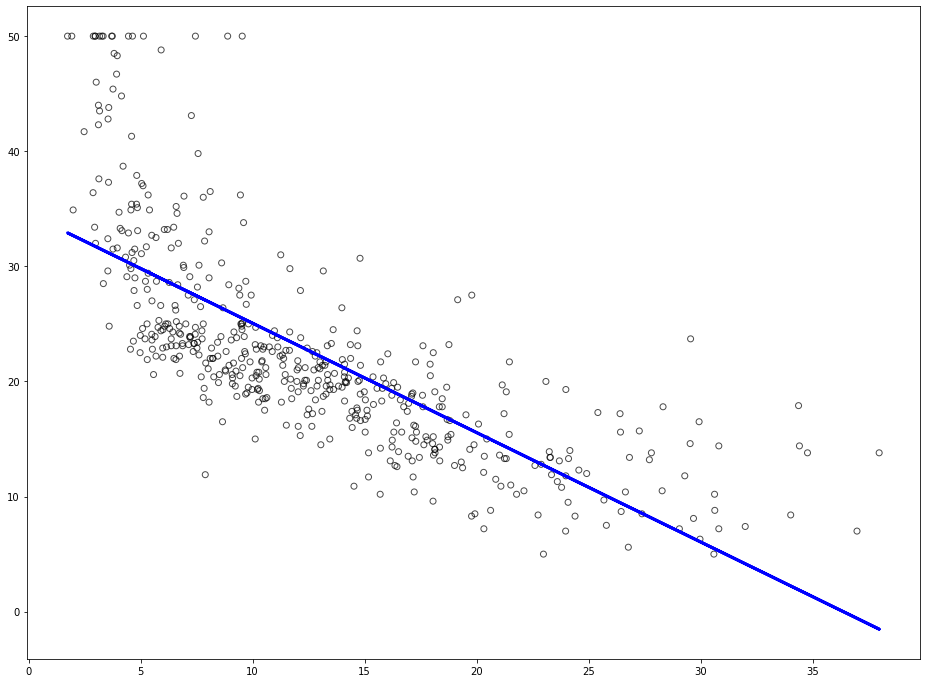

In [39]:
y_ = x * slope + intercept
plt.scatter(x, y, facecolors='None', edgecolors='k', alpha=.7)
plt.plot(x, y_, color="blue", linewidth=3)
plt.show()

In [162]:
MSE_stats = np.sqrt(mean_squared_error(y, y_))

In [163]:
print("R^2 statistic:           ", r2_score(y, y_))
print("w", round(100*r2_score(y, y_),2), "% zmiana x tłumaczy zmianę y")
print("Residual Standard Error: ", np.std((y - y_), ddof=2))
print("Percentage error:        ", np.std((y - y_), ddof=2) / np.mean(y))
print()
print("MSE:  ", MSE_stats)
print("MAE:  ", mean_absolute_error(y, y_))
print("MAPE: ", mean_absolute_percentage_error(y, y_))

R^2 statistic:            0.5441462975864799
w 54.41 % zmiana x tłumaczy zmianę y
Residual Standard Error:  11.41740615702976
Percentage error:         0.5067014730789589

MSE:   6.203464131426419
MAE:   4.505281166250568
MAPE:  0.2135207600872269


### 1. podział zbioru na treningowy i testowy

In [94]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=99)

### 2. Nauka modelu regresji zmiennej lstat do medv zbiorze treningowym 

In [97]:
model = LinearRegression()

In [98]:
model.fit(x_train, y_train)

LinearRegression()

### 3. Wyliczenie na zbiorze testowym predykcji i na ich podstawie porównanie do wartości rzeczywisych, wyliczanie MSE

In [99]:
y_pred = model.predict(x_test)

typowa ocena regresji: R2, RSE

In [103]:
print("R^2 statistic:           ", r2_score(y_test, y_pred))
print("w", round(100*r2_score(y_test, y_pred),2), "% zmiana x tłumaczy zmianę y")
print("Residual Standard Error: ", np.std((y_test - y_pred), ddof=2))
print("Percentage error:        ", np.std((y_test - y_pred), ddof=2) / np.mean(y_test))

R^2 statistic:            0.5024661697795522
w 50.25 % zmiana x tłumaczy zmianę y
Residual Standard Error:  6.449823396438943
Percentage error:         0.2802747809424853


funkcje kosztu dla regresji: MSE, MAE

In [158]:
MSE_linear = np.sqrt(mean_squared_error(y_test, y_pred))

In [164]:
print("MSE:  ", MSE_linear)
print("MAE:  ", mean_absolute_error(y_test, y_pred))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_pred))

MSE:   6.490354702794343
MAE:   4.449272398773945
MAPE:  0.21426813535199302


### 4. Zastosowanie GridSearchCV na zbiorze treningowym, który odpowie na pytanie który stopień wielomianu jest najlepszy

In [118]:
poly_regress_pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
random_search = GridSearchCV(poly_regress_pipeline, {
    'polynomialfeatures__degree': range(1, 10)
}, cv=3, verbose=1)
random_search.fit(x_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'polynomialfeatures__degree': 7}

### 5. Nauka modelu wielomianu odpowiedniego stopnia na zbiorze treningowym 

In [134]:
x2 = PolynomialFeatures(7).fit_transform(x) 

In [135]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=99)

In [142]:
model2 = LinearRegression()
model2 = model2.fit(x2_train, y2_train)

In [143]:
y2_pred = model2.predict(x2_test)

### 6. Sprawdzenie MSE tego modelu na zbiorze testowym jak w przypadku modelu zwykłej prostej regresji

In [180]:
MSE_polynominal_7 = np.sqrt(mean_squared_error(y2_test, y2_pred))

In [181]:
print("R^2 statistic:           ", r2_score(y2_test, y2_pred))
print("w", round(100*r2_score(y2_test, y2_pred),2), "% zmiana x tłumaczy zmianę y")
print("Residual Standard Error: ", np.std((y2_test - y2_pred), ddof=2))
print("Percentage error:        ", np.std((y2_test - y2_pred), ddof=2) / np.mean(y2_test))
print()
print("MSE:  ", MSE_polynominal_7)
print("MAE:  ", mean_absolute_error(y2_test, y2_pred))
print("MAPE: ", mean_absolute_percentage_error(y2_test, y2_pred))

R^2 statistic:            -0.2306077550800396
w -23.06 % zmiana x tłumaczy zmianę y
Residual Standard Error:  10.269008641493885
Percentage error:         0.4462361169579092

MSE:   10.207442628572297
MAE:   4.90384327355067
MAPE:  0.2697783207779875



### 7. Porównanie obu wyników i wskazanie lepszego modelu.

In [174]:
print("MSE_stats           :", MSE_stats)
print("MSE_linear          :", MSE_linear)
print("MSE_polynominal (7) :", MSE_polynominal_7)

MSE_stats           : 6.203464131426419
MSE_linear          : 6.490354702794343
MSE_polynominal (7) : 10.207442628572297


Dla kryterium MSE, najmniejszą wartość tego błędu wykazuje metoda "stats.linregress(x, y)".

Następnie regresja linowa okazuje się lepsza (tzn. ma mniejsze MSE) niż dla regresji wielomianowej.

Stała się rzecz wbrew oczekiwaniom, tzn. można było sie spodziewać, że wielomian będzie miał lepsze dopasowanie (mniejszy błąd).
Dzieje się tak dlatego, że GridSearchCV został przyłożony wyłącznie na zbiór treningowy, mógłby na cały - tak jak robiliśmy to na ćwiczeniach.
Dodatkowo, czerwoną lampkę zapala wyliczone ujemne R2. Jeśli dobrze rozumiem - oznacza to, że wartość średniokwadratowa błędu jest większa od wariancji zmiennej. Co jak mniemam potwierdza, że model jest raczej bez sensu.


Sprawdzę więc kroki 4-7 ponownie z obszerniejszym wsadem.

### 8. dodatek 1, autokorekta

In [175]:
random_search = GridSearchCV(poly_regress_pipeline, {
    'polynomialfeatures__degree': range(1, 10)
}, cv=3, verbose=1)
random_search.fit(x, y)
random_search.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'polynomialfeatures__degree': 5}

In [176]:
x3 = PolynomialFeatures(5).fit_transform(x) 

In [177]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,
                                                        y,
                                                        test_size=0.3,
                                                        random_state=99)

In [178]:
model3 = LinearRegression()
model3 = model3.fit(x3_train, y3_train)

In [179]:
y3_pred = model3.predict(x3_test)

In [183]:
MSE_polynominal_5 = np.sqrt(mean_squared_error(y3_test, y3_pred))

In [184]:
print("R^2 statistic:           ", r2_score(y3_test, y3_pred))
print("w", round(100*r2_score(y3_test, y3_pred),2), "% zmiana x tłumaczy zmianę y")
print("Residual Standard Error: ", np.std((y3_test - y3_pred), ddof=2))
print("Percentage error:        ", np.std((y3_test - y3_pred), ddof=2) / np.mean(y3_test))
print()
print("MSE:  ", MSE_polynominal_5)
print("MAE:  ", mean_absolute_error(y3_test, y3_pred))
print("MAPE: ", mean_absolute_percentage_error(y3_test, y3_pred))

R^2 statistic:            0.5490446614560689
w 54.9 % zmiana x tłumaczy zmianę y
Residual Standard Error:  6.182716645368851
Percentage error:         0.26866775210728305

MSE:   6.179081025834242
MAE:   4.072348652952964
MAPE:  0.18474042082070555


In [185]:
print("MSE_stats           :", MSE_stats)
print("MSE_linear          :", MSE_linear)
print("MSE_polynominal (5) :", MSE_polynominal_5)

MSE_stats           : 6.203464131426419
MSE_linear          : 6.490354702794343
MSE_polynominal (5) : 6.179081025834242


W takim przypadku regresor znalazł inny optymalny stopień wielomianu a wyliczony MSE jest najniższy.

W powiązaniu z najwyższym R2 można powiedzieć, że dla tego zadania - przyłożenie wielomianu stopnia piątego w regresji liniowej jest najbardziej precyzyjnym model modelem predykcyjnym.

### 9. dodatek 2, regresja przez OLS

In [145]:
my_lin_reg = ols("y ~ x", df).fit()

In [156]:
print(my_lin_reg.summary().tables[0])
print(my_lin_reg.summary().tables[1])
print(my_lin_reg.summary().tables[2])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.08e-88
Time:                        13:03:08   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

Jak widać metoda ta daje (względnie) wysokie R2, i beta0, beta1 zgodne z wcześniejszymi wyliczeniami.

Jest to także metoda szybka w obsłudze. Biorąc pod uwagę, że wielomian poprawił R2 dopiero na drugim miejscu po przecinku - sens jego użycia jest zastanawiający.

### 10. dodatek 3, wykres

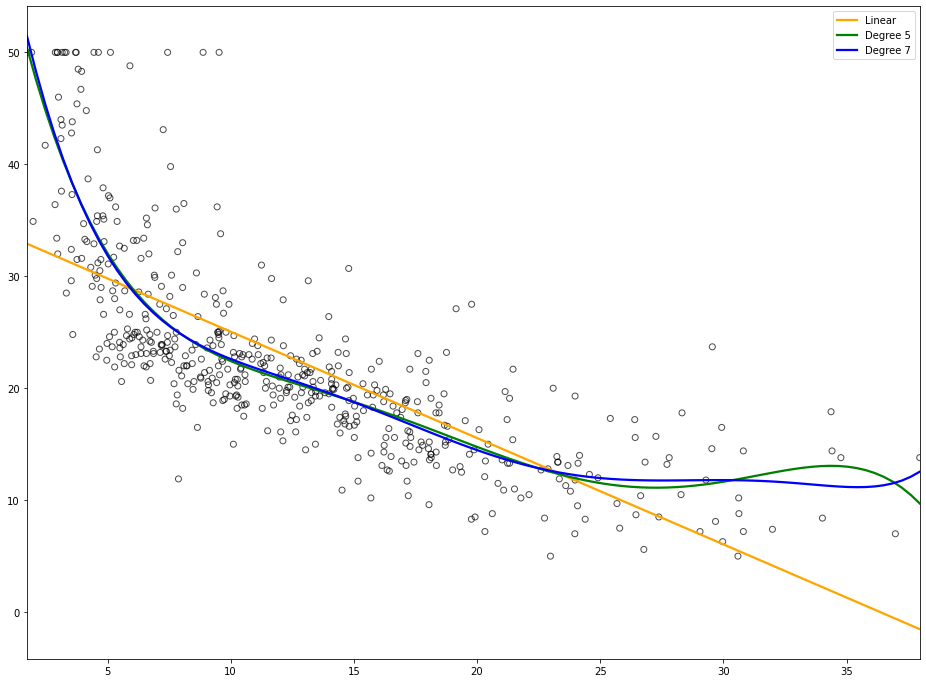

In [187]:
plt.scatter(x, y, facecolors='None', edgecolors='k', alpha=.7) 
sns.regplot(x, y, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x, y, ci=None, label='Degree 5', order=5, scatter=False, color='green')
sns.regplot(x, y, ci=None, label='Degree 7', order=7, scatter=False, color='blue')
plt.legend()
pass